## Background:
###### Consumer grievances against Banks, based on its severity and persistence can impact the rating of the compliance management function of the bank. Broadly they fall into two categories “Un-fair and deceptive business practice related (UFDP)” and “efficiency related (not UFDP)”

###### In order to maintain positive consumer experience, it is important for the bank to monitor these issues, identify weakness and take corrective action.
 
## ML Problem statement:
###### Given grievance level data for 86 federal banks of the US, with features limited to grievance start, end dates, business category, resolution comments, disputed flag, grievance description, come up with unique phrases to identify grievance as UFDP/or not.  Based on domain understanding build more features that can potentially help predict the rating of the compliance management function of Banks

## Goal: 
###### Build a statistical model to predict the rating of the compliance management function of Banks


## Data Exploration and Visualization

## Explore grievance level data 

1) There were 53680 unique observations at grievance level

2) 86 banks

3) 59 states

4) grievances dating from 1st April,2012 to Mid March 2016

###### Missing and duplicate records:

1) There were 121 records with missing state information

2) 5184 records were duplicate with only greivance id being different -> dropped them from analysis

3) Trend in grievance over years ( Year_flag,grievance count)

    Y12Apr_Yr13Mar -> 20099

    Y13Apr_Yr14Mar -> 22944

    Y14Apr_Yr15Mar -> 4436

    Y15Apr_Yr16Mar -> 1017
 
4) Top 5 states with highest recorded grievance since 2014 (Avg grievance per state = no.of grievances/no.of banks)

   => State9, State14, State43, State53, State47 (top 5 states)
   => Create additional features using this information
  
5) Distribution of the grievance issues by business line of operation

   => Mortgage and Credit card business is having highest no.of grieveance incidents (avg. 40%)
   

###### Text mining on grievance description to develop unique phrases (Bag of words) for creating features UFDP (Y/N) flag. Also to create other domain specific features

###### Text Cleaning

1) Limiting text to alphabets, numeric, special characters like $,!,%

2) Converting to lower case

3) Stop words -> extension; removing stop words

4) Lemmatization

5) Convert plurals to singulars

6) Part of speech tagging

7) TF, TFIDF matrix

8) Uni gram, bi gram, tri grams explorations for creating bag of words

9)  Word cloud exploration -> on all train data,FTC Act pdf

10) Word cloud for 'Grievance closed with explanation and Disputed Status (Y)' -> Text Mine for communication effectiveness keywords in these grievance description texts

11) Word cloud for 'line of business - Credit Card, Mortgage' -> Text Mine these description for specific patterns

12) Word cloud/text mine to understand the severity of Grievance Category -> "'Dealing with my lender or servicer'"
"'Loan servicing', 'payments', 'escrow account'", "'Loan modification','collection','foreclosure'"

###### K - means clustering (on TFIDF)

1) Objective: Segment grievance into UFDP or not

2) Choose Max features cutoff, PCA for feature reduction

3) Based on the elbow criteria 2 cluster solution was formed

4) Clusters formed were not convincing as they were broadly dividing the data into mortgage / credit card bucket 

##### Feature extractions at grievance level

1) Clustering (UFDP/Non-UFDP)
2) From the grievance description, FTC Act pdf, domain -> Created bag of words (14 separate corpus), to create 14 new features

##### New features created at grievance level are as follows -

1)BusinessPractices -> Business practices/plans/programs/protections

2)Communication -> More to do with negative/missleading communication, customer service experience

3)CIBILScore -> Cedit report/score impact

4)LateFeeInterestCharges -> Late fee/ interest charges issues

5)Payments -> Payment instructions followups

6)CloseCancel -> Request to close,cancel,stop,card,account,payments

7)purchase -> Purchase related concerns

8)DelayRecur -> Delayed responses/ recurring issues

9)legal -> Involves legal actions/parties

10)Mkting_Offer_Reward -> Marketing, offers, promotions,advertisements

11)PaymentIssue -> Issues related with payments

12)MortgageBroadly -> Broader concerns in mortgage loans

13)TeftFraudThreat -> Theft, fraud, threat,abuses

14)UFDP -> Critical/Core issues that can be tagged as UFDP

15)Daystoresolve -> Difference between DateOfResolution and DateOfGrievance

###### EDA on these derived features at grievance level

1) Visualize the distribution of days to resolve buckets (1month or less, 1 to 2 months, 2 to 3 months, 3 months or more)

=> About 89% of the grievance over the past 4 years have taken <1 months to resolve

2) Distribution of communicational issues for grieveance closed with explanation and disputed

=> There are 9202 out of 48496 grievences that are closed with explanation and disputes
=> Out of 9202 about 67 % are noticed to have communicaional issues

3) Similarly distribution of the grievance issues in all of the above derived columns to total grievance computed/plotted

Here are some insights

=> About 20% grievance related to CIBIL Scores of customers

=> 30% Late fee/ Interest charges related issues

=> 22% Marketing and offer related issues

=> 71% delays and recurrance related issues

=> 60% UFDP related issues

###### Create additional features based on insights obtained above

1) Create 5 additional features flags for top 5 (highest grievance issues) states

2) Create 2 variables using line of business for mortgage and credit cards

3) Create 4 additional variables for days to resolve

4) Create 1 additional variable for closed with explanation grievances

5) Create 1 additional variable for closed with explanation and disputed grievances

6) Create 1 additional variable for closed with explanation,disputed and having communication issues






## Visualization of couple of interesting features at grievance level

###### Distribution of grievance issues by months to resolve

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda2/lib/python2.7/si

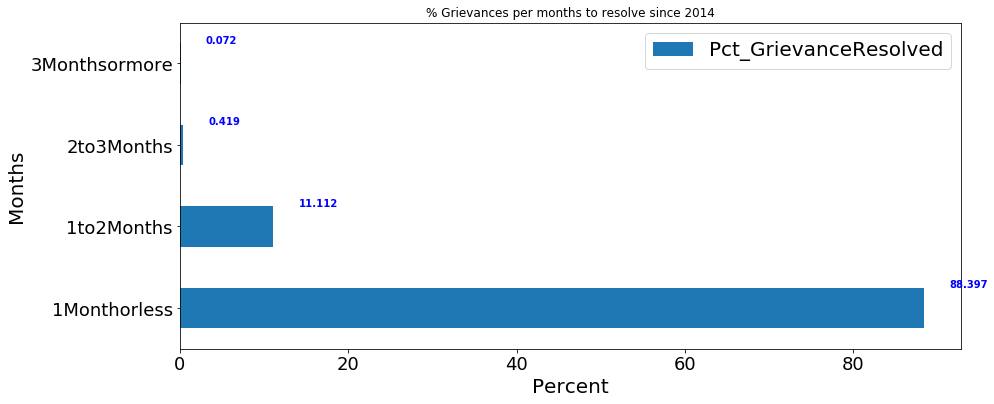

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

FinalGrievanceDt = pd.read_pickle('FinalGrievanceDt_Saved.pkl')

Daystoresolve = FinalGrievanceDt["Daystoresolve"].tolist()
FinalGrievanceDt['DaystoResolveflg']='NA'
FinalGrievanceDt['DaystoResolveflg'][(FinalGrievanceDt['Daystoresolve'] <= 30)] = '1Monthorless'
FinalGrievanceDt['DaystoResolveflg'][(FinalGrievanceDt['Daystoresolve'] > 30) & (FinalGrievanceDt['Daystoresolve'] <= 60)] = '1to2Months'
FinalGrievanceDt['DaystoResolveflg'][(FinalGrievanceDt['Daystoresolve'] > 60) & (FinalGrievanceDt['Daystoresolve'] <= 90)] = '2to3Months'
FinalGrievanceDt['DaystoResolveflg'][(FinalGrievanceDt['Daystoresolve'] > 90)] = '3Monthsormore'

GrievanceCntResolveBkt = FinalGrievanceDt[['DaystoResolveflg','GrievanceID']].groupby(['DaystoResolveflg'])['GrievanceID'].count().reset_index(name='No.ofGrievance').sort_values(['No.ofGrievance'])#,ascending=False    
GrievanceCntResolveBkt['Pct_GrievanceResolved'] = (((GrievanceCntResolveBkt['No.ofGrievance']/48496))*100).round(3)
GrievanceCntResolveBkt=GrievanceCntResolveBkt.sort_values(by=['DaystoResolveflg'],ascending=True)
GrievanceCntResolveBkt.set_index("DaystoResolveflg",drop=True,inplace=True)

import matplotlib.pyplot as plt
ax = GrievanceCntResolveBkt[['Pct_GrievanceResolved']].plot(kind='barh', title ="% Grievances per months to resolve since 2014", figsize=(14, 6), legend=True, fontsize=18)
ax.set_xlabel("Percent", fontsize=20)
ax.set_ylabel("Months", fontsize=20)
plt.legend(fontsize=20)
plt.rc('axes', titlesize=20)

values=GrievanceCntResolveBkt["Pct_GrievanceResolved"].tolist()

for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

###### Distribution of grieveances having UFDP issues


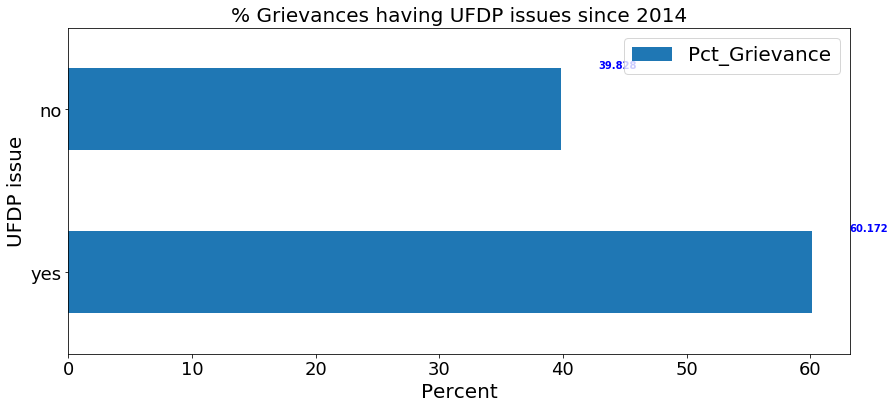

In [16]:

GrievanceCntUFDP = FinalGrievanceDt[['UFDP','GrievanceID']].groupby(['UFDP'])['GrievanceID'].count().reset_index(name='No.ofGrievance').sort_values(['No.ofGrievance'])
GrievanceCntUFDP['UFDP_IssueFlg'] = np.where(GrievanceCntUFDP['UFDP']==1, 'yes', 'no')
GrievanceCntUFDP['Pct_Grievance'] = (((GrievanceCntUFDP['No.ofGrievance']/48496))*100).round(3)
GrievanceCntUFDP=GrievanceCntUFDP.sort_values(by=['UFDP_IssueFlg'],ascending=False)
GrievanceCntUFDP.set_index("UFDP_IssueFlg",drop=True,inplace=True)

import matplotlib.pyplot as plt
ax = GrievanceCntUFDP[['Pct_Grievance']].plot(kind='barh', title ="% Grievances having UFDP issues since 2014", figsize=(14, 6), legend=True, fontsize=18)
ax.set_xlabel("Percent", fontsize=20)
ax.set_ylabel("UFDP issue", fontsize=20)
plt.legend(fontsize=20)
plt.rc('axes', titlesize=20)

values=GrievanceCntUFDP["Pct_Grievance"].tolist()

for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
plt.show()


## Data preparation at bank level for model building



1) All the derived features at grievance level are flag (1/0) variables

2) Roll up by counting the occurances of each features or issues at bank level 

3) Compute the % to the total no.of grievance issues per bank

###### 30 derived features at bank level are formed for model building

1) AvgdaystoResolve -> Average days to resolve

2) MediandaystoResolve -> Median days to resolve

3) State9_pct -> % issue in state 9 to total issue

4) State14_pct -> % issue in state 14 to total issue

5) State43_pct -> % issue in state 43 to total issue

6) State53_pct -> % issue in state 53 to total issue

7) State47_pct -> % issue in state 47 to total issue

8) BusinessPract_pct -> % concerns related to business practices to toal issues

9) Communicn_pct -> % issue with communicational concerns to total issue

10) LateFeeIntCharg_pct -> % issue with late fee and interest charges concerns to total issue

11) CIBILScore_pct -> % issue related CIBIL Score concerns to total issue

12) CloseCancel_pct -> % issue related closed/cancelled request concerns to total issue

13) purchaser_pct  -> % issue related purchase concerns to total issue

14) DelayRecur_pct -> % issue related delays and reccuring concerns to total issue

15) legal_pct -> % issue related legal concerns to total issue

16) MktOfferRwd_pct -> % issue related marketing/offer/reward issues to total issue

17) PaymentIssue_pct -> % issue related payment issues to total issue

18) MortgageBroad_pct -> % issue related broarder aspects (foreclosure etc) of mortgage concerns  to total issue

19) TeftFraudThreat_pct -> % issue related Theft fraud to total issue

20) Mortgage_pct -> % issue under mortgage category to total issue

21) CreditCard_pct -> % issue under credit card category to total issue

22) Lessthan1Month_pct -> % issue resolved less than a month to total issue

23) onetotwoMonths_pct -> % issue resolved in 1 to 2 months to total issue

24) twotothreeMonths_pct  -> % issue resolved in 2 to 3 months to total issue

25) threeormoreMonths_pct  -> % issue resolved in 3 or more months to total issue

26) ClosExpl_pct -> % issue closed with explanation to total issue

27) ClosExplDisp_pct -> % issue closed with explanation and disputed to total issue

28) ClosExplDispCom_pct -> % issue closed with explanation and disputed and having communicatinal issues to total issue

29) Payments_pct -> % issues related to payments to total issues

30) UFDP_pct -> % issues with UFDP conecrns to total issues

    
###### EDA on bank level data

1) Descriptive analysis

2) Missing values -> no

3) Distribution of all features -> Shape and Outliers

4) Outliers -> no

5) Corrlation between features - > Multicollinearity check (Correlation plot)

6) Feature selection/correlation with Target

 -> Recursive Feature Elimination
 
 -> Feature Importance (using extra tree classifier)
 
 -> Variable selection using logistic regression -> stat model
 
     Important features:
 
         1) LateFeeIntCharg_pct -> Late fee, interest charges related issues (-ve)
     
         2) CloseCancel_pct -> Closed/Cancel related issues (-ve)
     
         3) MktOfferRwd_pct -> Marketing/Offer/Reward related issues (-ve)
     
         4) TeftFraudThreat_pct -> Theft and fraud issues (-ve)
     
         5) CreditCard_pct -> Credit card issues (-ve)
     
         6) ClosExplDisp_pct -> Closed with explanation and disputed issues (-ve)
     
         7) Payments_pct -> Payment concens (+ve)
     
         8) UFDP_pct -> UFDP issues (-ve)
         
         9) AvgdaystoResolve -> Average days to resolve (+ve)
     
         10) State43_pct -> %issues from state 43 (-ve)
     
         

7) Importance/Association between Bank grade (response variable) and independent features. Visualizations for each of the 30 features

some important insights as follows

-> % of grievance issues 5% more in outstanding, followed by satisfactory and deficiency for resolution < 1Month

-> % of grievance issues related to marketing and offer concerns, 11% more in outstanding compared to deficiency

-> % of grievance issues related to theft and fraud concerns, 8% more in outstanding compared to deficiency

-> % of grievance issues related to mortgage concern, 25% more in outstanding compared to deficiency

-> % of grievance issues related to credit cards concern, 44% more in outstanding compared to deficiency

-> % of grievance issues related to closed with explanation and disputed, 6% more in outstanding compared to deficiency

-> % of grievance issues related to UFDP  concerns, 9% more in outstanding compared to deficiency



## Some interesting insights/Visuals 

In [4]:
FnllBanklvldata_Tgt = pd.read_pickle('FnllBanklvldata_Tgt_Saved.pkl')

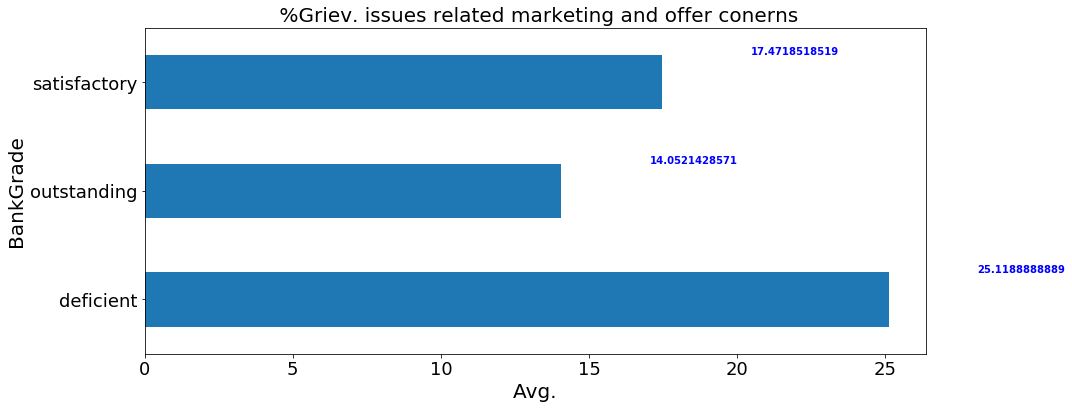

In [5]:
## % of grievance issues related to marketing and offer concerns as compared to total issues of the bank vs bank grade

Bnkmkt= FnllBanklvldata_Tgt[['BankGrade','MktOfferRwd_pct']].groupby(['BankGrade'])['MktOfferRwd_pct'].mean().reset_index(name='Avg:MktOfferRwd_pct')
Bnkmkt.set_index("BankGrade",drop=True,inplace=True)
ax = Bnkmkt[['Avg:MktOfferRwd_pct']].plot(kind='barh', title =" %Griev. issues related marketing and offer conerns", figsize=(14, 6), legend=False, fontsize=18)
ax.set_xlabel("Avg.", fontsize=20)
ax.set_ylabel("BankGrade", fontsize=20)
plt.rc('axes', titlesize=20)
values=Bnkmkt["Avg:MktOfferRwd_pct"].tolist()

for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
plt.show()

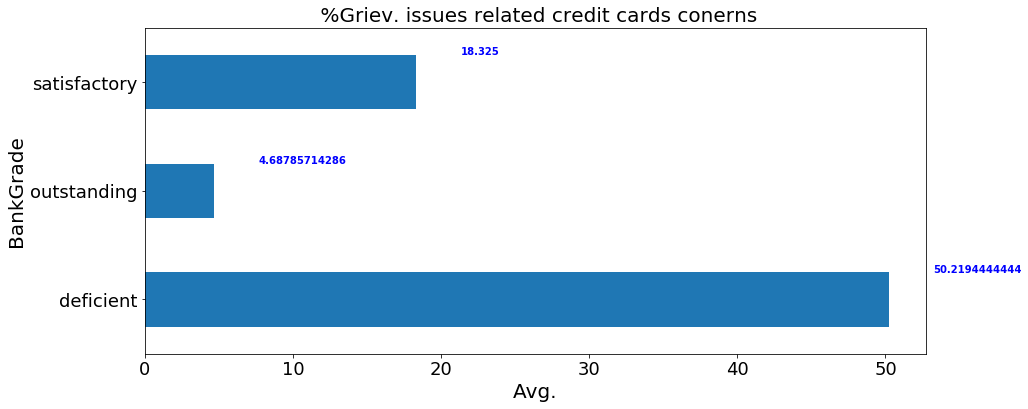

In [6]:
## % of grievance issues related to credit cards concerns as compared to total issues of the bank vs bank grade

BnkgrdCC= FnllBanklvldata_Tgt[['BankGrade','CreditCard_pct']].groupby(['BankGrade'])['CreditCard_pct'].mean().reset_index(name='Avg:CreditCard_pct')
BnkgrdCC.set_index("BankGrade",drop=True,inplace=True)

ax = BnkgrdCC[['Avg:CreditCard_pct']].plot(kind='barh', title =" %Griev. issues related credit cards conerns", figsize=(14, 6), legend=False, fontsize=18)
ax.set_xlabel("Avg.", fontsize=20)
ax.set_ylabel("BankGrade", fontsize=20)
plt.rc('axes', titlesize=20)
values=BnkgrdCC["Avg:CreditCard_pct"].tolist()

for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
plt.show()

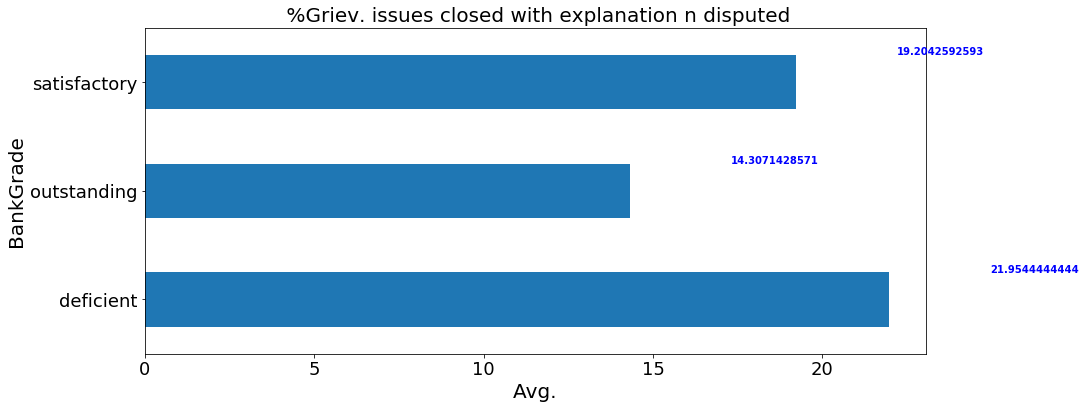

In [7]:
## % of grievance issues related to closed with explanation an disputed as compared to total issues of the bank vs bank grade

BnkgrdClsdExpDisp= FnllBanklvldata_Tgt[['BankGrade','ClosExplDisp_pct']].groupby(['BankGrade'])['ClosExplDisp_pct'].mean().reset_index(name='Avg:ClosExplDisp_pct')
BnkgrdClsdExpDisp.set_index("BankGrade",drop=True,inplace=True)
ax = BnkgrdClsdExpDisp[['Avg:ClosExplDisp_pct']].plot(kind='barh', title =" %Griev. issues closed with explanation n disputed", figsize=(14, 6), legend=False, fontsize=18)
ax.set_xlabel("Avg.", fontsize=20)
ax.set_ylabel("BankGrade", fontsize=20)
plt.rc('axes', titlesize=20)
values=BnkgrdClsdExpDisp["Avg:ClosExplDisp_pct"].tolist()

for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
plt.show()

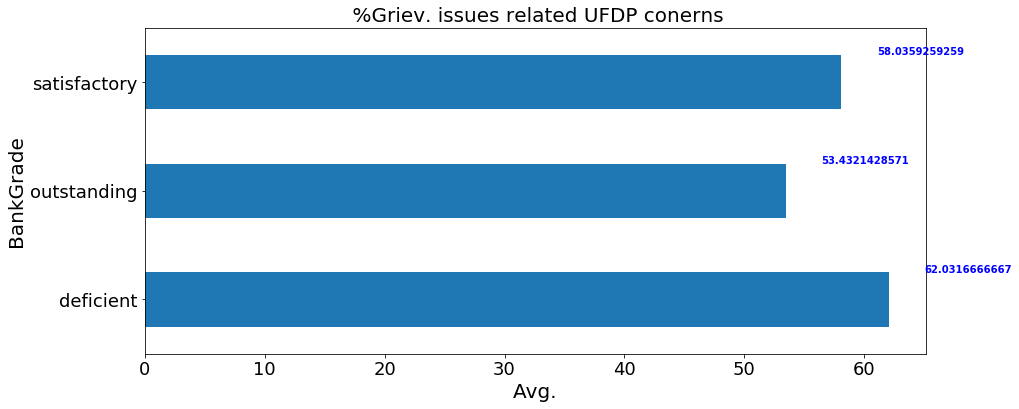

In [8]:
## % of grievance issues related to UFDP concerns as compared to total issues of the bank vs bank grade

BnkgrdUFDP= FnllBanklvldata_Tgt[['BankGrade','UFDP_pct']].groupby(['BankGrade'])['UFDP_pct'].mean().reset_index(name='Avg:UFDP_pct')
BnkgrdUFDP.set_index("BankGrade",drop=True,inplace=True)

ax = BnkgrdUFDP[['Avg:UFDP_pct']].plot(kind='barh', title =" %Griev. issues related UFDP conerns", figsize=(14, 6), legend=False, fontsize=18)
ax.set_xlabel("Avg.", fontsize=20)
ax.set_ylabel("BankGrade", fontsize=20)
plt.rc('axes', titlesize=20)
values=BnkgrdUFDP["Avg:UFDP_pct"].tolist()

for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
plt.show()

In [26]:
## Distribution of bank grade

Bankgrade = FnllBanklvldata_Tgt[['BankGrade','BankID']].groupby(['BankGrade'])['BankID'].nunique().reset_index(name='Count')
Bankgrade

,BankGrade,Count
0,deficient,18
1,outstanding,14
2,satisfactory,54


In [ ]:
## Test data preparation

1) Follow all the data cleaning and text preprocessing (from train data) on test data

2) Features Extraction /creation -> using the bag of words created from train data


## Model Building

1) Performed Smote for class imbalance 

2) Performed PCA as there is multicollinearity between features

3) Feature scaling

4) Tried multiple models with different combinations of features using following 8 ML algorithms

 -> Logistic regression
 
 -> Naive bayes
 
 -> SVM
 
 -> SVM kernel
 
 -> KNN
 
 -> Decision tree classification
 
 -> Random forest classification
 
 -> XG boost
 

###### Model validation and parameter tuning

1)Performed Grid search / paremeter tuning on SVM

2)Splitting data into train (80%) val(20%)

3)Cross validation 10 fold -> mean accuracy and standard deviation of the accuracy scores considered





## Summary and Conclusion


1) Deriving bag of words form text is complex, involves subjectivity, requires clear domain understaning

2) It would be ideal to work in collaboration with domain experts while deriving these features statisticaly/text mining

3) Sample size for modelling is small, also has some amount of class imbalance issue

4) However some of the variables derived are very interesting and have pretty decent explanatory power (Marketing/Offer, theft and fraud, credit card, UFDP etc)

5) Out of all the models tried -> SVM and XG Boost were performing well. However XG Boost provided best accuracy score of 59% on test. 

6) XG Boost -> validation accuracy 85%, cross validation accuracy 81%, with 12% standard deviation (which is pretty decent)

7) However there is room to improve the model performance -> trying out various combinations of important variables, parameter tuning (complex models), efficient implementation of stacking,
revisiting text mining (and bag of words) etc

## ***************************************Thank You**********************************************